# High Profile Impacts

In [1]:
import os
import tweepy as tw
import pandas as pd
import numpy as np
import re
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
from credentials import * 

In [2]:
API_Key = 'EYeAWPuDaqPX52Q70oYS9F31l'
API_Secret_Key = 'ntt1T8r8IH6fsPvo3AGhhTsca5uFXwstbKVPdvYju3ELvbD38s'
Access_Token = '1397377898714177536-XBX72edUL0KrRvjXIRJ7tQEcRnf5ZG'
Access_Token_Secret = 'UVHK4dYJIdTaWfqjeNmmp94twlHlbxDp1EHEAGpBhdt7n'

In [3]:
auth = tw.OAuthHandler(API_Key, API_Secret_Key)
auth.set_access_token(Access_Token, Access_Token_Secret)
api = tw.API(auth, wait_on_rate_limit=True)

### Retrieve Influencer's Page and Select Relevant Data

In [4]:
tweets = api.user_timeline(screen_name="rihanna", count=25)

In [5]:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])
data['User Mentions'] = np.array([tweet.entities['user_mentions'] for tweet in tweets], dtype = object)

### Drop all tweets that do not have anyone mentioned and then extract first user Mentioned from tweet.entities['user_mentions'].

In [6]:
data = data[data['User Mentions'].str.len() != 0]
user_mentions = pd.Series(data['User Mentions'])
screen_names = []
for k,v in user_mentions.items():
    screen_names.append(user_mentions[k][0]['screen_name'])
#display(data_filter1.head(10))

### Create new column 'User Mentioned' in updated data_frame.

In [7]:
data['User Mentioned'] = np.array(screen_names, dtype = object)
data.drop(columns = ['User Mentions'], inplace = True)
data.reset_index(drop = True)

,Tweets,len,Date,Likes,RTs,User Mentioned
0,"Drip ya skin in a hydrating, glossy, whipped b...",140,2021-05-11 20:10:15,14929,775,fentyskin
1,"Pick it up now at https://t.co/qw885ko2Vs, @Se...",83,2021-03-26 22:01:10,6755,327,Sephora
2,It's the first #TutorialTuesday of 2021 and y'...,140,2021-03-23 18:52:51,37375,3520,fentybeauty
3,savage af. don’t trip. \n\nNew @SavageXFenty ...,128,2021-03-01 05:50:38,188557,15109,SavageXFenty
4,when ya bored but in a hurry! 😂 just a lil 5 m...,140,2021-02-27 02:31:53,82071,6845,fentybeauty
5,when @PopcaanMusic said “me nuh wan ya wear no...,113,2021-02-15 19:51:40,305780,34614,PopcaanMusic
6,RT @AmnestyNigeria: Nigerian authorities must:...,140,2021-02-13 18:39:57,0,4122,AmnestyNigeria
7,Ummm.... @SRat246 I need this playlist. You s...,70,2021-02-13 17:18:14,43884,2405,SRat246
8,coming to you guys 2/12 on https://t.co/yH0c5k...,90,2021-02-07 23:11:59,8541,400,Sephora
9,🧖🏿‍♀️👁 back with another baddie for your skinc...,139,2021-02-07 23:11:58,53385,3973,fentyskin


### Now we'll want to turn our attention to the user that was mentioned. We'll retrieve X number of tweets before and X number of tweets after and map out the Likes and Retweets that the tweets are getting to see if the plug was successful.

In [8]:
user_tweets = api.user_timeline(screen_name = data['User Mentioned'][0], count = 100)

In [9]:
user_data = pd.DataFrame(data = [tweet.text for tweet in user_tweets], columns = ['Tweets'])
user_data['Date'] = np.array([tweet.created_at for tweet in user_tweets])
user_data['Likes']  = np.array([tweet.favorite_count for tweet in user_tweets])
user_data['RTs']    = np.array([tweet.retweet_count for tweet in user_tweets])

### Everybody knows retweets are more desirable than likes - so lets make an new column "engagement" that weighs a RT = 2 and a like = 1 for each post.

In [10]:
engagement = user_data['Likes'] + user_data['RTs']*2
user_data['engagement'] = np.array(engagement)

### Finally, let's zoom in a little so we can get a better view:

In [11]:
data['Date'][0]

Timestamp('2021-05-11 20:10:15')

In [12]:
user_data = user_data[(user_data['Date'] > datetime.datetime.strptime('2021-05-01 00:00:00.0', '%Y-%m-%d %H:%M:%S.%f')) & (user_data['Date'] < datetime.datetime.strptime('2021-05-20 00:00:00.0', '%Y-%m-%d %H:%M:%S.%f'))]
user_data.reset_index(drop = True)

,Tweets,Date,Likes,RTs,engagement
0,@fentybeauty @TheWebbyAwards yes sis!!! 🥺🥺🥺,2021-05-18 23:24:45,50,1,52
1,🏆🏆🏆🏆 thank you @TheWebbyAwards! https://t.co/v...,2021-05-18 23:24:04,216,37,290
2,@l_17_n LOL triggered,2021-05-18 01:47:48,11,1,13
3,We know y’all saw #KaneLim with that red carpe...,2021-05-18 01:47:22,52,3,58
4,@TonioDivine 😇😇😇,2021-05-13 21:32:26,3,0,3
5,RT @TonioDivine: Fenty Skin’s Butta Drop Body ...,2021-05-13 21:32:17,0,7,14
6,@porshh_toofly thank you! 💜 this was a bomb as...,2021-05-13 21:31:59,18,0,18
7,"RT @porshh_toofly: so, i know most of you know...",2021-05-13 21:31:15,0,46,92
8,RT @Oh_So_Natural: Just ordered my Fenty Skin ...,2021-05-13 21:30:00,0,3,6
9,@sirhcg get into it!!!,2021-05-13 21:28:08,5,1,7


### Now let's visualize the impact!

,Tweets,Date,Likes,RTs,engagement
15,@fentybeauty @TheWebbyAwards yes sis!!! 🥺🥺🥺,2021-05-18 23:24:45,50,1,52
16,🏆🏆🏆🏆 thank you @TheWebbyAwards! https://t.co/v...,2021-05-18 23:24:04,216,37,290
17,@l_17_n LOL triggered,2021-05-18 01:47:48,11,1,13
18,We know y’all saw #KaneLim with that red carpe...,2021-05-18 01:47:22,52,3,58
19,@TonioDivine 😇😇😇,2021-05-13 21:32:26,3,0,3
20,RT @TonioDivine: Fenty Skin’s Butta Drop Body ...,2021-05-13 21:32:17,0,7,14
21,@porshh_toofly thank you! 💜 this was a bomb as...,2021-05-13 21:31:59,18,0,18
22,"RT @porshh_toofly: so, i know most of you know...",2021-05-13 21:31:15,0,46,92
23,RT @Oh_So_Natural: Just ordered my Fenty Skin ...,2021-05-13 21:30:00,0,3,6
24,@sirhcg get into it!!!,2021-05-13 21:28:08,5,1,7


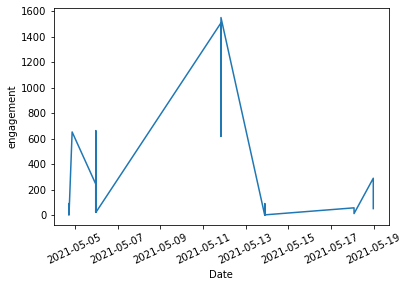

In [13]:
sns.lineplot(x = "Date", y = "engagement",
             data = user_data)
plt.xticks(rotation = 25)
user_data

### It is more extreme than I anticipated! It seems that Rihanna's plug actually caused the user to experience a huge jolt of engagement on the day that Rihanna plugged the product, but it was very short lived. In this fifteen day window, the top three tweets were all revolving around Rihanna's Plug.

In [14]:
user_data.iloc[12:15]

,Tweets,Date,Likes,RTs,engagement
27,"RT @rihanna: Drip ya skin in a hydrating, glos...",2021-05-11 20:15:34,0,775,1550
28,Y’all’s momma is not this fine. 🤷🏽‍♀️ \n\n#BUT...,2021-05-11 20:15:26,542,38,618
29,Touch dat BUTTA baby! 😛 Our momma @rihanna is ...,2021-05-11 20:13:03,1240,134,1508
